In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#   Análise incial dos dados

In [354]:
df = pd.read_excel('base_telecomunicacao.xlsx',sheet_name='Sheet1')

In [355]:
df.describe()

,Idade,Renda_Mensal,Uso_Internet,Satisfacao_Servico,Interesse_5G,Pessoas_Residencia,Gasto_Internet,Interesse_Combo,Atendimento_Recebido,Satisfacao_Geral
count,1905.000000,1939.000000,1924.000000,1907.000000,1883.000000,1965.000000,1914.000000,1899.000000,1924.000000,1904.000000
mean,43.622572,9626.135637,6.549376,5.668065,5.587892,4.837659,274.261233,5.499210,5.630457,5.597689
std,17.288482,9663.569508,3.377937,2.805975,2.788717,2.603774,114.884545,2.746465,2.827715,2.826553
min,5.000000,-500.000000,0.000000,0.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000
25%,31.000000,4342.000000,4.000000,4.000000,4.000000,3.000000,187.000000,4.000000,4.000000,4.000000
50%,43.000000,7662.000000,6.000000,6.000000,6.000000,4.000000,263.000000,6.000000,6.000000,6.000000
75%,56.000000,13689.500000,9.000000,8.000000,8.000000,7.000000,365.000000,7.000000,8.000000,8.000000
max,120.000000,100000.000000,15.000000,10.000000,10.000000,10.000000,500.000000,10.000000,10.000000,10.000000


In [356]:
df.dtypes

Ocupacao                   object
Idade                     float64
Cidade_Nascimento          object
Dispositivos               object
Renda_Mensal              float64
Uso_Internet              float64
Troca_Celular              object
Satisfacao_Servico        float64
Operadora_Celular          object
Interesse_5G              float64
Assistencia_TV             object
Preferencia_Compra         object
Pessoas_Residencia        float64
Gasto_Internet            float64
Plano_Preferencia          object
Conhecimento_IoT           object
Interesse_Combo           float64
Regiao                     object
Uso_Internet_5h            object
Genero                     object
Plano_Atual                object
Dispositivo_Utilizado      object
Plano_5G                   object
Motivo_Troca               object
Trabalho_Remoto            object
Possui_Plano_Telefonia     object
Servicos_Streaming         object
Prioridade_Plano           object
Pagar_Velocidade           object
Atendimento_Re

# Limpeza de dados

In [357]:

df.loc[df['Ocupacao'] == 'XYZ123', 'Ocupacao'] = np.nan
print(df['Ocupacao'].value_counts(dropna=False))

Ocupacao
NaN             2587
Estudante        484
Outro            455
Engenheiro       368
Autônomo         235
Comerciante      229
Médico           214
Professor        125
Desempregado     121
Advogado         110
Name: count, dtype: int64


In [358]:

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('sp', 'São Paulo')

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('São paulo', 'São Paulo')
df['Cidade_Nascimento'].value_counts()

Cidade_Nascimento
São Paulo         157
Aracaju           130
Curitiba          130
Teresina          123
Belo Horizonte    122
Florianópolis     121
Maceió            121
Goiânia           119
Campinas          116
Rio de Janeiro    115
Vitória           113
João Pessoa       113
Fortaleza         111
Natal             109
Brasília          108
Salvador          103
Belém             103
Manaus            101
Recife             95
Porto Alegre       91
Outra              88
Name: count, dtype: int64

In [359]:
df['Dispositivos'].value_counts(dropna=False)

Dispositivos
NaN    2478
2       958
3       736
1       362
4       224
5+      111
na       26
-1       19
Mu       14
Name: count, dtype: int64

In [360]:

df.loc[df['Dispositivos'] == 'Mu', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == 'na', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == '-1', 'Dispositivos'] = np.nan

print(df['Dispositivos'].value_counts(dropna=False))


Dispositivos
NaN    2537
2       958
3       736
1       362
4       224
5+      111
Name: count, dtype: int64


In [361]:
df.loc[df['Operadora_Celular'] == '123', 'Operadora_Celular'] = np.nan
df.loc[df['Operadora_Celular'] == 'indef', 'Operadora_Celular'] = np.nan
print(df['Operadora_Celular'].value_counts(dropna=False))

Operadora_Celular
NaN      2587
Claro     727
Vivo      586
TIM       429
Oi        341
Outra     258
Name: count, dtype: int64


In [362]:
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('ambos', 'Indiferente')
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('não sei', 'Indiferente')
df['Preferencia_Compra'].value_counts()

Preferencia_Compra
Online           1398
Lojas Físicas     743
Indiferente       297
Name: count, dtype: int64

In [363]:
df.loc[df['Plano_Preferencia'] == '?', 'Plano_Preferencia'] = np.nan
df['Plano_Preferencia'].value_counts()

Plano_Preferencia
Pós-pago    1454
Pré-pago     937
Name: count, dtype: int64

In [364]:
df.loc[df['Uso_Internet_5h'] == '?', 'Uso_Internet_5h'] = np.nan
df['Uso_Internet_5h'].value_counts()

Uso_Internet_5h
Sim    1664
Não     677
Name: count, dtype: int64

In [365]:
df.loc[df['Servicos_Streaming'] == 'Não sei', 'Servicos_Streaming'] = np.nan
df.loc[df['Servicos_Streaming'] == '-', 'Servicos_Streaming'] = np.nan
df['Servicos_Streaming'].value_counts()

Servicos_Streaming
1         926
2         604
Nenhum    465
3+        235
Name: count, dtype: int64

In [366]:
df.loc[df['Plano_Familiar'] == '?', 'Plano_Familiar'] = np.nan
df['Plano_Familiar'].value_counts()

Plano_Familiar
Sim    1190
Não    1151
Name: count, dtype: int64

In [367]:

df.loc[df['Troca_Celular'] == '?', 'Troca_Celular'] = np.nan

In [368]:
df['Conhecimento_IoT'].value_counts()

Conhecimento_IoT
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [369]:

limite_caracteres = 1000

df['Conhecimento_IoT'] = df['Conhecimento_IoT'].apply(
    lambda x: np.nan if isinstance(x, str) and len(x) > limite_caracteres else x
)


print(df['Conhecimento_IoT'].value_counts(dropna=False))


Conhecimento_IoT
NaN     3015
5.0      283
6.0      251
7.0      247
4.0      237
0.0      156
1.0      155
2.0      144
3.0      141
8.0      104
9.0      103
10.0      92
Name: count, dtype: int64


# Colunas escolhidas pelo grupo para a clusterização

In [370]:
df_escolhidos = df[['Ocupacao', 'Idade', 'Renda_Mensal', 'Gasto_Internet', 'Regiao', 'Genero', 'Plano_Atual', 'Motivo_Troca']]
df_escolhidos.head()


,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,NaN,60.0,5681.0,368.0,Sudeste,Feminino,Basico,Preco Alto
1,NaN,21.0,6172.0,NaN,NaN,Masculino,Basico,NaN
2,NaN,21.0,NaN,NaN,NaN,Feminino,NaN,Atendimento Ruim
3,NaN,34.0,3782.0,394.0,NaN,NaN,Basico,Atendimento Ruim
4,NaN,NaN,NaN,339.0,Nordeste,Masculino,Basico,NaN


In [371]:
df_escolhidos.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,1905.000000,1939.000000,1914.000000
mean,43.622572,9626.135637,274.261233
std,17.288482,9663.569508,114.884545
min,5.000000,-500.000000,51.000000
25%,31.000000,4342.000000,187.000000
50%,43.000000,7662.000000,263.000000
75%,56.000000,13689.500000,365.000000
max,120.000000,100000.000000,500.000000


# Lidando com Outliers

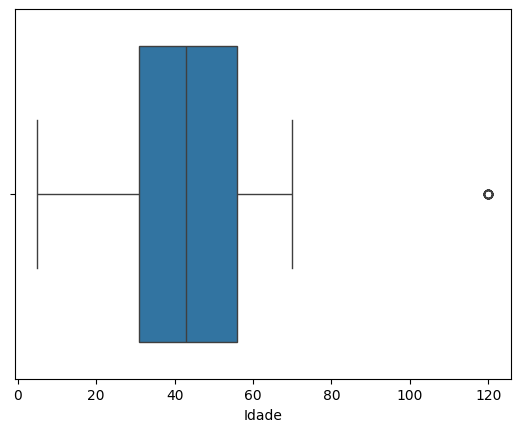

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/791149785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/791149785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)


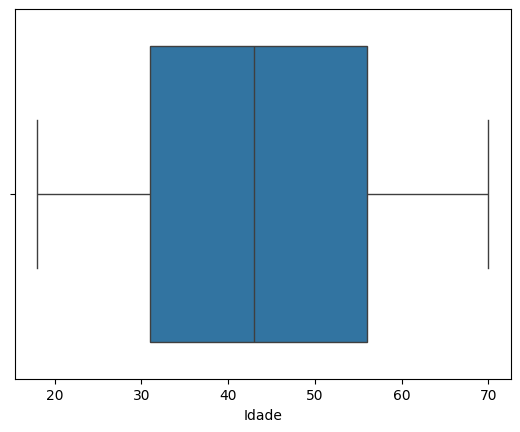

In [373]:
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/1087627321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(100000, 19980)
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/1087627321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(-500, 1324)


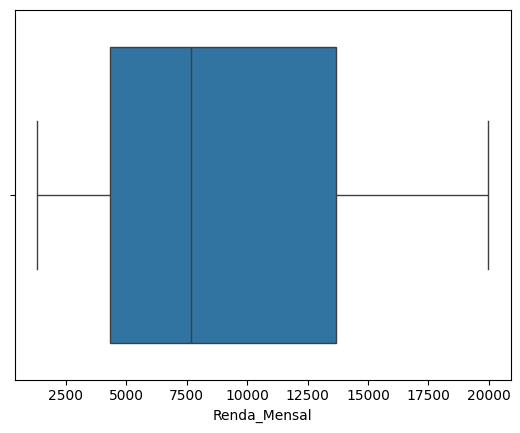

In [374]:
import seaborn as sns
df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(100000, 19980)
df_escolhidos['Renda_Mensal'] = df_escolhidos['Renda_Mensal'].replace(-500, 1324)

sns.boxplot(x=df_escolhidos['Renda_Mensal'])
plt.show()

In [378]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

def impute_mixed_data(df):
    """
    Impute missing values in a dataset with mixed data types using IterativeImputer.
    
    Args:
        df (pd.DataFrame): Input dataframe with missing values
    
    Returns:
        pd.DataFrame: Dataframe with imputed values
    """
    # Create copy to avoid modifying original data
    df_imp = df.copy()
    
    # Identify numeric and categorical columns
    numeric_cols = df_imp.select_dtypes(include=[np.number]).columns
    categorical_cols = df_imp.select_dtypes(exclude=[np.number]).columns
    
    # Handle categorical variables
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        # Fit on non-null values
        non_null_data = df_imp[col].dropna()
        le.fit(non_null_data)
        # Transform all data
        df_imp[col] = pd.Series(le.transform(non_null_data), index=non_null_data.index)
        label_encoders[col] = le
    
    # Initialize and fit IterativeImputer
    imputer = IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=100),
        max_iter=10,
        random_state=42
    )
    
    # Fit and transform
    imputed_data = imputer.fit_transform(df_imp)
    
    # Convert back to DataFrame
    df_imputed = pd.DataFrame(imputed_data, columns=df_imp.columns, index=df_imp.index)
    
    # Reverse transform categorical variables
    for col in categorical_cols:
        df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].round().astype(int))
    
    return df_imputed

# Usage example
# imputed_df = impute_mixed_data(df_escolhidos)


In [379]:
df_escolhido_imputed = impute_mixed_data(df_escolhidos)

/Users/jgfaraco/Insper Junior/Clustering/Telecconect_analysis/env/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [381]:
df.to_csv('base_marketing.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

def predict_with_random_forest(df, target_column, test_size=0.2, random_state=42):
    """
    Trains a Random Forest model on mixed data types and makes predictions.
    
    Args:
        df: DataFrame containing the data
        target_column: Name of the column to predict
        test_size: Proportion of data to use for testing
        random_state: Random seed for reproducibility
    
    Returns:
        model: Trained RandomForestRegressor
        X_test: Test features
        y_test: Test target values
        y_pred: Predictions
        feature_importance: DataFrame of feature importances
    """
    # Separate features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Handle categorical variables
    encoders = {}
    for column in X.select_dtypes(include=['object']).columns:
        encoders[column] = LabelEncoder()
        X[column] = encoders[column].fit_transform(X[column])
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Train model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return model, X_test, y_test, y_pred, feature_importance

# Example usage:
model, X_test, y_test, predictions, importance = predict_with_random_forest(
    df=df_escolhidos,
    target_column='Idade'
)

ValueError: Input y contains NaN.

In [ ]:
df_escolhido_imputed

,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,Engenheiro,60.00,5681.00,368.00,Sudeste,Feminino,Basico,Preco Alto
1,Engenheiro,21.00,6172.00,229.52,Norte,Masculino,Basico,Cobertura Ruim
2,Engenheiro,21.00,8488.52,270.90,Norte,Feminino,Basico,Atendimento Ruim
3,Engenheiro,34.00,3782.00,394.00,Sudeste,Masculino,Basico,Atendimento Ruim
4,Engenheiro,49.29,7753.73,339.00,Nordeste,Masculino,Basico,Cobertura Ruim
...,...,...,...,...,...,...,...,...
4923,Desempregado,40.80,7238.45,312.64,Norte,Masculino,Intermediario,Cobertura Ruim
4924,Engenheiro,40.80,7238.45,312.64,Norte,Masculino,Intermediario,Cobertura Ruim
4925,Comerciante,40.80,7238.45,312.64,Norte,Masculino,Intermediario,Cobertura Ruim
4926,Comerciante,40.80,7238.45,312.64,Norte,Masculino,Intermediario,Cobertura Ruim


In [ ]:
df_escolhidos.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,1905.000000,1939.000000,1914.000000
mean,43.236220,9024.978339,274.261233
std,15.069686,5505.247953,114.884545
min,18.000000,1324.000000,51.000000
25%,31.000000,4342.000000,187.000000
50%,43.000000,7662.000000,263.000000
75%,56.000000,13689.500000,365.000000
max,70.000000,19980.000000,500.000000


In [ ]:
df_escolhido_imputed.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,4928.000000,4928.000000,4928.000000
mean,42.028056,8131.533564,294.138259
std,9.633116,3631.147188,75.819756
min,18.000000,1324.000000,51.000000
25%,40.800000,7238.450000,271.000000
50%,40.800000,7238.450000,312.640000
75%,43.000000,8182.250000,312.640000
max,70.000000,19980.000000,500.000000


In [ ]:
#Nao esquecer de calcular a corr geral antes e depois 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_corr_norm = df_escolhidos.copy()
# Identificar as colunas do tipo 'object'
object_columns = df_corr_norm.select_dtypes(include=['object']).columns

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada coluna de tipo 'object'
for col in object_columns:
    # Substituir NaN por um valor, como 'missing'
    df_corr_norm[col] = df_corr_norm[col].fillna('missing')

    df_corr_norm[col] = df_corr_norm[col].astype(str)
    
    # Aplicar o LabelEncoder
    df_corr_norm[col] = label_encoder.fit_transform(df_corr_norm[col])

# Ver o dataframe modificado
df_corr_norm=df_corr_norm.corr()
df_corr_norm

,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
Ocupacao,1.000000,NaN,NaN,NaN,-0.537146,-0.602581,-0.574123,-0.552011
Idade,NaN,1.000000,-0.017884,0.068811,-0.028130,-0.028166,-0.013813,-0.016083
Renda_Mensal,NaN,-0.017884,1.000000,0.010390,-0.049945,0.002676,0.034509,-0.012304
Gasto_Internet,NaN,0.068811,0.010390,1.000000,0.013842,-0.001833,-0.004599,-0.063732
Regiao,-0.537146,-0.028130,-0.049945,0.013842,1.000000,0.536254,0.492750,0.486335
Genero,-0.602581,-0.028166,0.002676,-0.001833,0.536254,1.000000,0.561952,0.545480
Plano_Atual,-0.574123,-0.013813,0.034509,-0.004599,0.492750,0.561952,1.000000,0.490622
Motivo_Troca,-0.552011,-0.016083,-0.012304,-0.063732,0.486335,0.545480,0.490622,1.000000


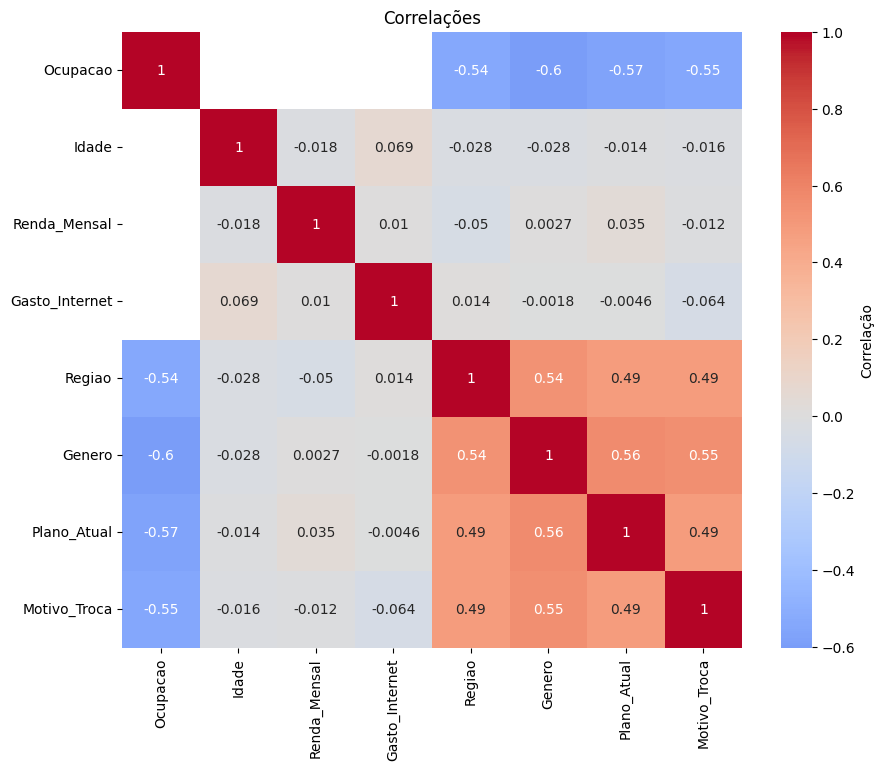

In [ ]:
# Configurar o tamanho e o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_norm, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlação'})
plt.title("Correlações")
plt.show()

In [ ]:
#Nao esquecer de calcular a corr geral antes e depois 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_corr_imputed = df_reverted.copy()
# Identificar as colunas do tipo 'object'
object_columns = df_corr_imputed.select_dtypes(include=['object']).columns

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada coluna de tipo 'object'
for col in object_columns:
    # Substituir NaN por um valor, como 'missing'

    df_corr_imputed[col] = df_corr_imputed[col].astype(str)
    
    # Aplicar o LabelEncoder
    df_corr_imputed[col] = label_encoder.fit_transform(df_corr_imputed[col])

# Ver o dataframe modificado
df_corr_imputed=df_corr_imputed.corr()
df_corr_imputed

,Ocupacao,Regiao,Genero,Plano_Atual,Motivo_Troca
Ocupacao,1.000000,-0.031773,0.042777,NaN,NaN
Regiao,-0.031773,1.000000,-0.310851,NaN,NaN
Genero,0.042777,-0.310851,1.000000,NaN,NaN
Plano_Atual,NaN,NaN,NaN,NaN,NaN
Motivo_Troca,NaN,NaN,NaN,NaN,NaN


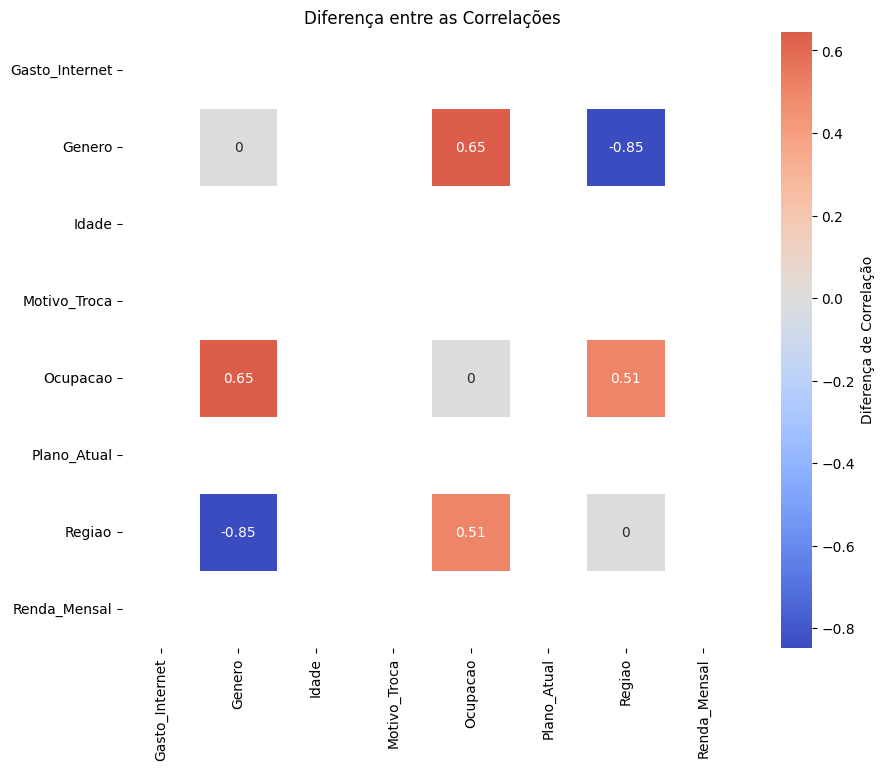

In [ ]:
# Calcular a diferença entre as correlações
corr_diff = df_corr_imputed - df_corr_norm

# Configurar o tamanho e o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Diferença de Correlação'})
plt.title("Diferença entre as Correlações")
plt.show()

In [ ]:
df_test = df_escolhidos.copy()
df_test['Ocupacao'] = df_test['Ocupacao'].replace(None,df_test.mode)

TypeError: 'regex' must be a string or a compiled regular expression or a list or dict of strings or regular expressions, you passed a 'bool'